**Import Lib**

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
# Now download the dataset from Kaggle (change this to the correct dataset)
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
 94% 82.0M/86.8M [00:01<00:00, 50.3MB/s]
100% 86.8M/86.8M [00:01<00:00, 51.0MB/s]


In [ ]:
# Unzip the dataset
!unzip brain-tumor-classification-mri.zip

Archive:  brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  infl

**Data Preparation**

In [ ]:
# Setting up paths and parameters
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
X_train = []
Y_train = []

In [ ]:
# Load training data
for label in labels:
    folderPath = os.path.join('Training', label)
    for image_name in os.listdir(folderPath):
        image_path = os.path.join(folderPath, image_name)
        img = cv2.imread(image_path)
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

In [ ]:
# Load testing data (same as above)
for label in labels:
    folderPath = os.path.join('Testing', label)
    for image_name in os.listdir(folderPath):
        image_path = os.path.join(folderPath, image_name)
        img = cv2.imread(image_path)
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

In [ ]:
# Convert data to NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
# Shuffle data
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

In [ ]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

In [ ]:
# Convert labels to categorical format
y_train_new = [labels.index(i) for i in y_train]
y_train = to_categorical(y_train_new)

In [ ]:
y_test_new = [labels.index(i) for i in y_test]
y_test = to_categorical(y_test_new)

In [ ]:
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (2937, 150, 150, 3)
Testing data shape: (327, 150, 150, 3)


**Model Building**

In [ ]:
model = Sequential()

In [ ]:
# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

In [ ]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

In [ ]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

In [ ]:
# Add fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [ ]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

**Training**

In [ ]:
from keras.optimizers import Adam

# Set a learning rate
learning_rate = 0.0001  # You can adjust this value

# Create Adam optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the specified optimizer and learning rate
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 158ms/step - accuracy: 0.9536 - loss: 0.1599 - val_accuracy: 0.9014 - val_loss: 0.2870
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9606 - loss: 0.1146 - val_accuracy: 0.8605 - val_loss: 0.4092
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.9604 - loss: 0.1278 - val_accuracy: 0.8946 - val_loss: 0.2919
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9687 - loss: 0.0997 - val_accuracy: 0.8605 - val_loss: 0.3733
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.9549 - loss: 0.1563 - val_accuracy: 0.8265 - val_loss: 0.4666
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.9759 - loss: 0.0863 - val_accuracy: 0.8810 - val_loss: 0.3172
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.9732 - loss: 0.0762 - val_accuracy: 0.9082 - val_loss: 0.3093
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.9764 - loss: 0.0708 - val_accuracy: 0.89

**Visualize Results**

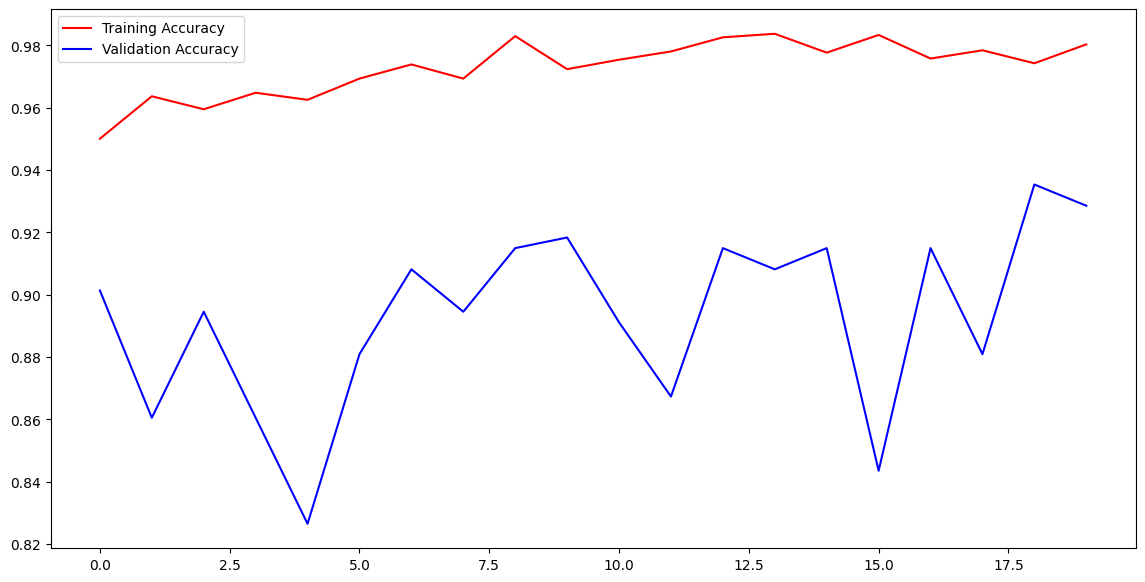

In [ ]:
# Plot accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.figure(figsize=(14, 7))
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.legend()
plt.show()


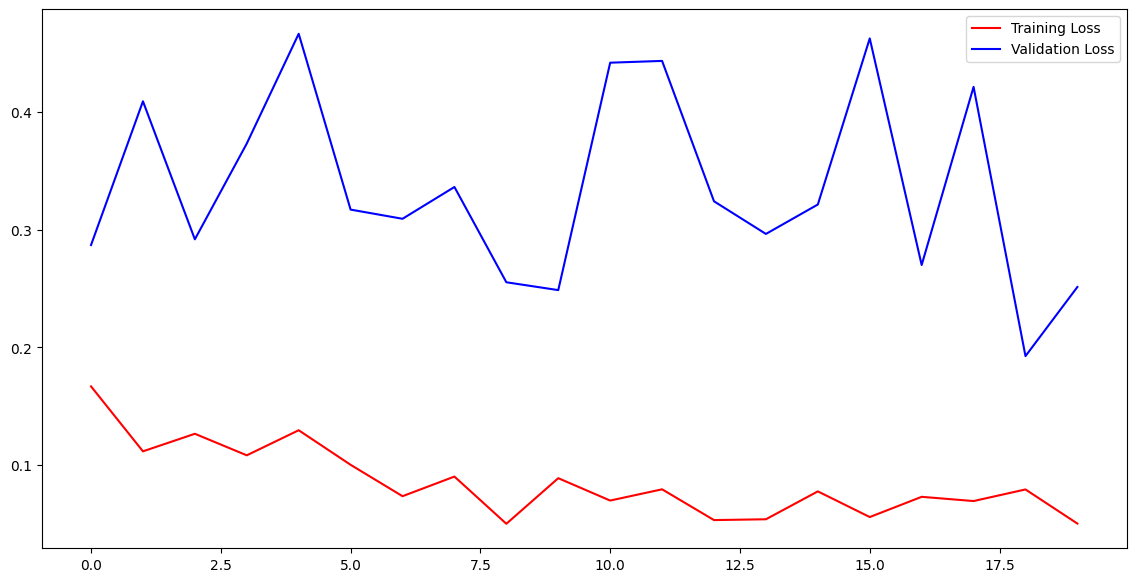

In [ ]:
# Plot loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(14, 7))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.legend()
plt.show()

**Testing and Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: pituitary_tumor


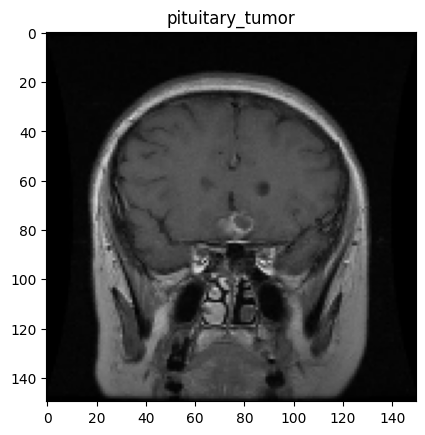

In [ ]:
from tensorflow.keras.preprocessing import image

# Load a sample image from the dataset and make a prediction
img = cv2.imread('Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img, (150, 150))
img_array = img.reshape(1, 150, 150, 3)

# Predict the class
prediction = model.predict(img_array)
predicted_class = labels[np.argmax(prediction)]
print(f"Predicted Class: {predicted_class}")

# Show the image
plt.imshow(img)
plt.title(predicted_class)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class: glioma_tumor


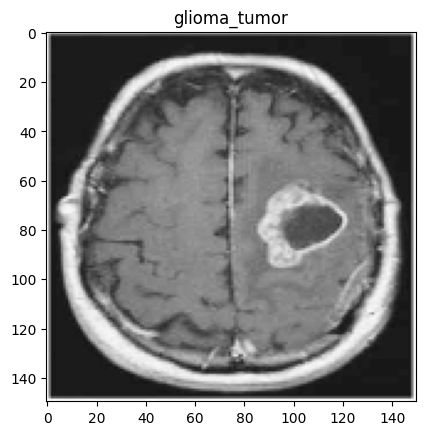

In [ ]:
# Load a sample image from the dataset and make a prediction
img = cv2.imread('/content/Testing/glioma_tumor/image(79).jpg')
img = cv2.resize(img, (150, 150))
img_array = img.reshape(1, 150, 150, 3)

# Predict the class
prediction = model.predict(img_array)
predicted_class = labels[np.argmax(prediction)]
print(f"Predicted Class: {predicted_class}")

# Show the image
plt.imshow(img)
plt.title(predicted_class)
plt.show()


In [ ]:
# Save the model as an H5 file
model.save("braintumor_model.h5")

# Save the model in the TensorFlow SavedModel format (.keras)
model.save("braintumor_model.keras", save_format="keras")


In [ ]:
import json

# Convert the history to a dictionary
history_dict = history.history

# Save the training history as a JSON file
with open("training_history.json", "w") as json_file:
    json.dump(history_dict, json_file)

In [ ]:
from google.colab import files

# Download the H5 model file
files.download('braintumor_model.h5')

# Download the Keras model file
files.download('braintumor_model.keras')

# Download the training history (assuming you've already saved it)
files.download('training_history.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>